100%|██████████| 22750/22750 [17:00<00:00, 11.49it/s]


2. X: (22750, 1089)  y: (22750, 1089)


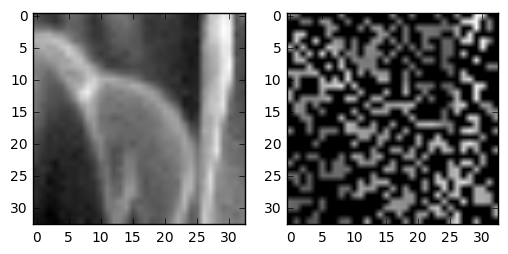

In [29]:
"""
URL : mmlab.ie.cuhk.edu.hk/projects/SRCNN/SRCNN_train.zip
"""

import os
import joblib
import numpy as np
from tqdm import tqdm, trange
import scipy.ndimage as spimg
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image

np.random.seed(7)
%matplotlib inline

""" 1. GET ORIGINAL DATA AND CONVERT INTO PATCHES """
def get_data(url_local, filename_alldata, filename_phi
                     , WIDTH, HEIGHT, MR, MAX_PATCHES, plt_show=True): 
    objs = []
    idx_rand = np.random.randint(0, len(os.listdir(url_local)))
    if plt_show : f, axarr = plt.subplots(1,2)
        
    for i, file in enumerate(os.listdir(url_local)) : 
        obj = spimg.imread(url_local + '/' + file, flatten=True, mode = 'L')
        if i == idx_rand:
            print ('1. Image Shape:', obj.shape)
            
        obj_patches = image.extract_patches_2d(obj, (WIDTH, HEIGHT), max_patches=MAX_PATCHES)
        for j, obj_patch in enumerate(obj_patches):
            objs.append(obj_patch)
            if i == idx_rand and j == idx_rand:
                print ('1. Patch Shape:', obj_patch.shape)
                if plt_show : 
                    axarr[0].imshow(obj, cmap = plt.cm.gray)
                    axarr[1].imshow(obj_patches[0], cmap = plt.cm.gray)
    
    print ('1. Total Data Patches:', len(objs))
    with open(filename_alldata, 'wb') as handle:
        joblib.dump(objs, handle, compress=True)
    
    phi = np.random.choice([0, 1], size=(1, WIDTH * HEIGHT), p=[1.0 - MR, MR])
    with open(filename_phi, 'wb') as handle:
        joblib.dump(phi, handle, compress=True)
        print ('1. Phi:', np.unique(phi, return_counts=True))

def get_data_transform(url_file, url_filename_alldata, url_filename_phi, url_filename_X, url_filename_y
                           , WIDTH, HEIGHT, test=0):
    with open(url_filename_alldata, 'rb') as handle:
        data_patches = joblib.load(handle)
    
    with open(url_filename_phi, 'rb') as handle:
        phi = joblib.load(handle)
        
    X = []; y = []
    # pbar = tqdm(total=len(data_patches))
    if test : 
        pbar = np.arange(len(data_patches))
        rand_idx = 0
    else:
        pbar = trange(len(data_patches))
        rand_idx = np.random.randint(0, len(data_patches))

    for i in pbar:
        data_patch = data_patches[i]
        y_temp = data_patch.reshape((1, data_patch.shape[0] * data_patch.shape[1]))
        # X_temp = y_temp * phi
        X_temp = np.multiply(y_temp, phi)
        if (test == 1) and (i == rand_idx):
            print ('2. Original Data Shape(y): ', data_patch.shape)
            print ('2. Reshaped Data Shape(y): ', y_temp.shape)
            print ('2. Reshaped Data Shape(X): ', X_temp.shape)
        if i == rand_idx:
            f, axarr = plt.subplots(1,2)
            axarr[0].imshow(y_temp.reshape((WIDTH,HEIGHT)), cmap = plt.cm.gray)
            axarr[1].imshow(X_temp.reshape((WIDTH,HEIGHT)), cmap = plt.cm.gray)
            
        if i == 0:
            y = y_temp
            X = X_temp
        else:
            y = np.append(y, y_temp, axis = 0)
            X = np.append(X, X_temp, axis = 0)
        if i > 100 and test == 1:
            break
    
    print ('2. X:', X.shape, ' y:', y.shape)

    with open(url_filename_X, 'wb') as handle:
        joblib.dump(X, handle, compress=True)
    with open(url_filename_y, 'wb') as handle:
        joblib.dump(y, handle, compress=True)

if __name__ == "__main__":
    """ BASIC PARAMS """
    MR = 0.4
    WIDTH = 33
    HEIGHT = 33
    MAX_PATCHES = 250
    
    """ LOCAL URLS """
    url_file             = os.path.dirname(os.getcwd())
    url_local            = url_file + '/data/original/SRCNN/Train/'
    url_mr_folder        = 'mr_' + str(int(MR*100))
    url_filename_alldata = url_file + '/data/' + url_mr_folder + '/data_patches.gz'
    url_filename_phi     = url_file + '/data/' + url_mr_folder + '/data_phi.gz'
    url_filename_X       = url_file + '/data/' + url_mr_folder + '/data_patches_X.gz'
    url_filename_y       = url_file + '/data/' + url_mr_folder + '/data_patches_y.gz'
    
    # get_data(url_local, url_filename_alldata, url_filename_phi, WIDTH, HEIGHT, MR, MAX_PATCHES)
    get_data_transform(url_file, url_filename_alldata, url_filename_phi, url_filename_X, url_filename_y
                                   , WIDTH, HEIGHT, test=0)